In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import *
from sklearn import cross_validation

/usr/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
import pickle

filename='X_train'
infile = open(filename,'rb')
X_train=pickle.load(infile)
infile.close()

filename='y_train'
infile = open(filename,'rb')
y_tr=pickle.load(infile)
infile.close()

filename='X_test'
infile = open(filename,'rb')
X_test=pickle.load(infile)
infile.close()

filename='y_test'
infile = open(filename,'rb')
y_test=pickle.load(infile)
infile.close()

In [2]:
#Unpickling
import pickle

infile = open('Train_BOW_Std','rb')
X_train_bow_standarized_data=pickle.load(infile)
infile.close()

infile = open('Train_TFIDF_Std','rb')
X_train_tfidf_standarized_data=pickle.load(infile)
infile.close()

infile = open('Train_AvgW2V_std','rb')
X_train_AvgW2V_standarized_data=pickle.load(infile)
infile.close()

infile = open('Test_BOW_Std','rb')
X_test_bow_standarized_data=pickle.load(infile)
infile.close()

infile = open('Test_TFIDF_Std','rb')
X_test_TFIDF_standarized_data=pickle.load(infile)
infile.close()

infile = open('Test_AvgW2V_std','rb')
X_test_AvgW2V_standarized_data=pickle.load(infile)
infile.close()

infile = open('TFIDF_W2V_Train_standarized_data','rb')
X_train_TFIDF_W2V_standarized_data=pickle.load(infile)
infile.close()

infile = open('TFIDF_W2V_Test_standarized_data','rb')
X_test_TFIDF_W2V_standarized_data=pickle.load(infile)
infile.close()


In [36]:
#Unpickling
import pickle
filename='Train_BOW_SVD'
infile = open(filename,'rb')
X_train_bow_standarized_data_SVD=pickle.load(infile)
infile.close()

filename='Test_BOW_SVD'
infile = open(filename,'rb')
X_test_bow_standarized_data_SVD=pickle.load(infile)
infile.close()


filename='Train_TFIDF_SVD'
infile = open(filename,'rb')
X_train_tfidf_standarized_data_SVD=pickle.load(infile)
infile.close()

filename='Test_TFIDF_SVD'
infile = open(filename,'rb')
X_test_tfidf_standarized_data_SVD=pickle.load(infile)
infile.close()

# Optimal_K

In [37]:
def Optimal_K(X_Train,y_Train,name):
    cv_scores = []
    neighbors = range(11,40,2)
    
    # perform 5-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm=name)
        scores = cross_val_score(knn, X_Train, y_Train, cv=5, scoring='f1',n_jobs=-1)
        cv_scores.append(scores.mean())

    # determining best k
    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
    print('\nThe optimal number of neighbors =',optimal_k)
    
    return optimal_k

# CV_Error_Plot

In [38]:
def CV_Error_Plot(X_Train,y_Train,name):
    cv_scores = []
    neighbors = range(11,40,2)
    
    # perform 5-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm=name)
        scores = cross_val_score(knn, X_Train, y_Train, cv=5, scoring='accuracy',n_jobs=-1)
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors =',optimal_k)

    # plot misclassification error vs k 
    plt.plot(neighbors, MSE)

    for xy in zip(neighbors, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

    print("the misclassification error for each k value is : " ,np.round(MSE,3))
    return optimal_k

# Train_Test_Error

In [39]:
def Train_Test_Error(optimal_k,X_train,y_train,X_test,y_test):
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_optimal.fit(X_train, y_train)

    #Training Error
    y_pred_tr = knn_optimal.predict(X_train)
    acc_tr = accuracy_score(y_train, y_pred_tr)
    train_error = 1-acc_tr
    print('\n Train error is : {}'.format(train_error))

    #Test Error
    y_pred_ts = knn_optimal.predict(X_test)
    acc_ts = accuracy_score(y_test, y_pred_ts)
    test_error = 1-acc_ts
    print('\n Test error is : {}'.format(test_error))
    
    return train_error,test_error,y_pred_ts,knn_optimal

# Confusion Matrix

In [40]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# KNN-BOW

In [41]:
optimalk_bow_kdtree = Optimal_K(X_train_bow_standarized_data_SVD,y_tr,'kd_tree')

('\nThe optimal number of neighbors =', 19)


('\nThe optimal number of neighbors =', 19)


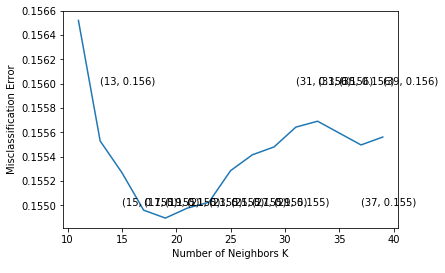

('the misclassification error for each k value is : ', array([0.157, 0.156, 0.155, 0.155, 0.155, 0.155, 0.155, 0.155, 0.155,
       0.155, 0.156, 0.156, 0.156, 0.155, 0.156]))


In [42]:
k_bow_kdtree = CV_Error_Plot(X_train_bow_standarized_data_SVD,y_tr,'kd_tree')

In [43]:
train_error_bow_kdt,test_error_bow_kdt,y_pred_ts_bow_kdt,knn_optimal_bow_kdt = \
Train_Test_Error(optimalk_bow_kdtree,X_train_bow_standarized_data_SVD,y_tr,X_test_bow_standarized_data_SVD,y_test)


 Train error is : 0.152566648221

 Test error is : 0.170825262998



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.67      0.03      0.05      4557
          1       0.83      1.00      0.91     21774

avg / total       0.80      0.83      0.76     26331


  CONFUSION MATRIX
[[  115  4442]
 [   56 21718]]

  Plot of CONFUSION MATRIX


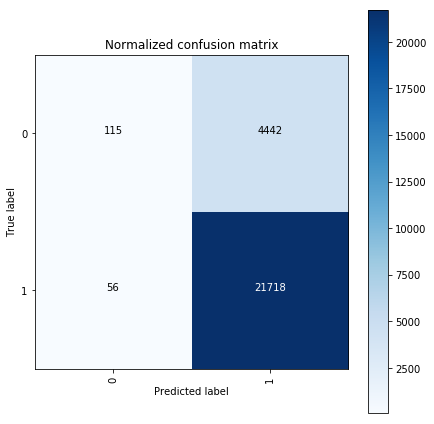

In [44]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_bow_kdt)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_bow_kdt)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [54]:
optimalk_bow_brute = Optimal_K(X_train_bow_standarized_data_SVD,y_tr,'brute')

('\nThe optimal number of neighbors =', 19)


('\nThe optimal number of neighbors =', 19)


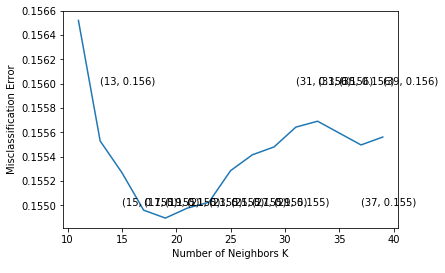

('the misclassification error for each k value is : ', array([0.157, 0.156, 0.155, 0.155, 0.155, 0.155, 0.155, 0.155, 0.155,
       0.155, 0.156, 0.156, 0.156, 0.155, 0.156]))


In [55]:
k_bow_brute = CV_Error_Plot(X_train_bow_standarized_data_SVD,y_tr,'brute')

In [56]:
train_error_bow_brute,test_error_bow_brute,y_pred_ts_bow_brute,knn_optimal_bow_brute = \
Train_Test_Error(optimalk_bow_kdtree,X_train_bow_standarized_data_SVD,y_tr,X_test_bow_standarized_data_SVD,y_test)


 Train error is : 0.152566648221

 Test error is : 0.170825262998



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.67      0.03      0.05      4557
          1       0.83      1.00      0.91     21774

avg / total       0.80      0.83      0.76     26331


  CONFUSION MATRIX
[[  115  4442]
 [   56 21718]]

  Plot of CONFUSION MATRIX


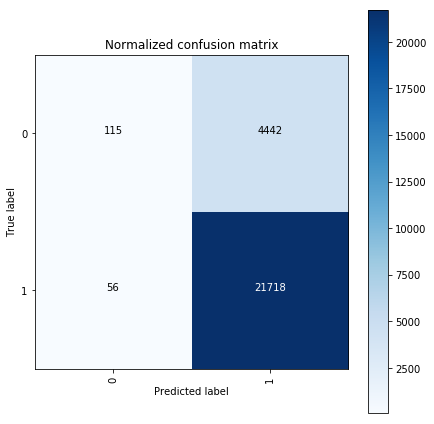

In [57]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_bow_brute)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_bow_brute)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

# TFIDF 

In [59]:
optimalk_tfidf_kdtree = Optimal_K(X_train_tfidf_standarized_data_SVD,y_tr,'kd_tree')

('\nThe optimal number of neighbors =', 27)


('\nThe optimal number of neighbors =', 27)


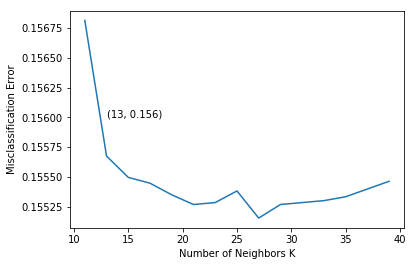

('the misclassification error for each k value is : ', array([0.157, 0.156, 0.155, 0.155, 0.155, 0.155, 0.155, 0.155, 0.155,
       0.155, 0.155, 0.155, 0.155, 0.155, 0.155]))


In [60]:
k_tfidf_kdtree = CV_Error_Plot(X_train_tfidf_standarized_data_SVD,y_tr,'kd_tree')

In [61]:
train_error_tfidf_kdt,test_error_tfidf_kdt,y_pred_ts_tfidf_kdt,knn_optimal_tfidf_kdt = \
Train_Test_Error(optimalk_tfidf_kdtree,X_train_tfidf_standarized_data_SVD,y_tr,X_test_tfidf_standarized_data_SVD,y_test)


 Train error is : 0.153315321767

 Test error is : 0.171432911777



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.63      0.02      0.04      4557
          1       0.83      1.00      0.91     21774

avg / total       0.79      0.83      0.76     26331


  CONFUSION MATRIX
[[  106  4451]
 [   63 21711]]

  Plot of CONFUSION MATRIX


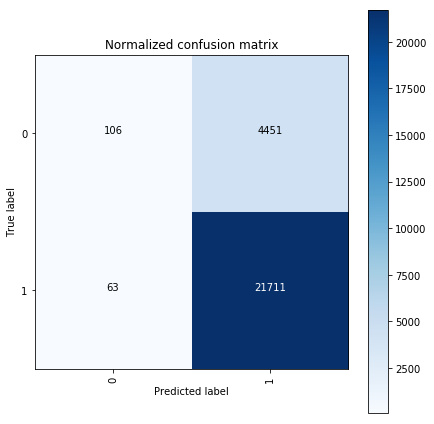

In [62]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_tfidf_kdt)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_tfidf_kdt)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [63]:
optimalk_tfidf_brute = Optimal_K(X_train_tfidf_standarized_data_SVD,y_tr,'brute')

('\nThe optimal number of neighbors =', 27)


('\nThe optimal number of neighbors =', 27)


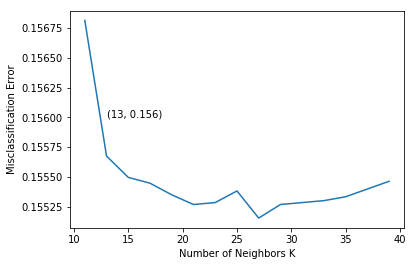

('the misclassification error for each k value is : ', array([0.157, 0.156, 0.155, 0.155, 0.155, 0.155, 0.155, 0.155, 0.155,
       0.155, 0.155, 0.155, 0.155, 0.155, 0.155]))


In [64]:
k_tfidf_brute = CV_Error_Plot(X_train_tfidf_standarized_data_SVD,y_tr,'brute')

In [65]:
train_error_tfidf_brute,test_error_tfidf_brute,y_pred_ts_tfidf_brute,knn_optimal_tfidf_brute = \
Train_Test_Error(optimalk_tfidf_kdtree,X_train_tfidf_standarized_data_SVD,y_tr,X_test_tfidf_standarized_data_SVD,y_test)


 Train error is : 0.153315321767

 Test error is : 0.171432911777



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.63      0.02      0.04      4557
          1       0.83      1.00      0.91     21774

avg / total       0.79      0.83      0.76     26331


  CONFUSION MATRIX
[[  106  4451]
 [   63 21711]]

  Plot of CONFUSION MATRIX


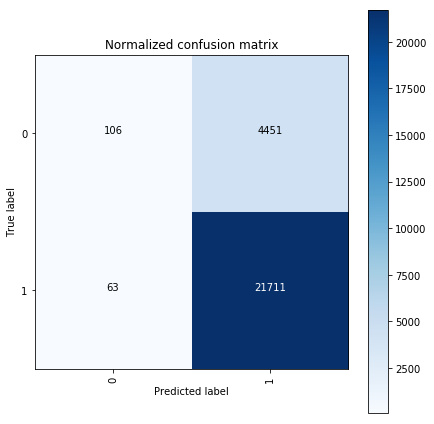

In [66]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_tfidf_brute)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_tfidf_brute)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

# AVG-W2V

In [28]:
optimalk_avgw2v_kdt = Optimal_K(X_train_AvgW2V_standarized_data,y_tr,'kd_tree')

('\nThe optimal number of neighbors =', 15)


('\nThe optimal number of neighbors =', 15)


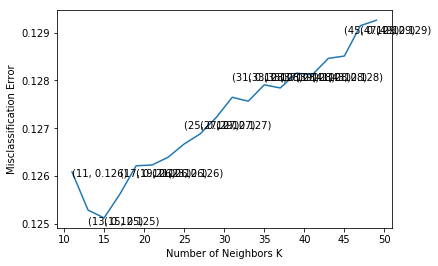

('the misclassification error for each k value is : ', array([0.126, 0.125, 0.125, 0.126, 0.126, 0.126, 0.126, 0.127, 0.127,
       0.127, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.129,
       0.129, 0.129]))


In [29]:
k_avgw2v_kdt = CV_Error_Plot(X_train_AvgW2V_standarized_data,y_tr,'kd_tree')

In [30]:
train_error_avgw2v_kdt,test_error_avgw2v_kdt,y_pred_ts_avgw2v_kdt,knn_optimal_avgw2v_kdt = \
Train_Test_Error(optimalk_avgw2v_kdt,X_train_AvgW2V_standarized_data,y_tr,X_test_AvgW2V_standarized_data,y_test)


 Train error is : 0.111633735881

 Test error is : 0.1620903118



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.65      0.14      0.23      4557
          1       0.85      0.98      0.91     21774

avg / total       0.81      0.84      0.79     26331


  CONFUSION MATRIX
[[  633  3924]
 [  344 21430]]

  Plot of CONFUSION MATRIX


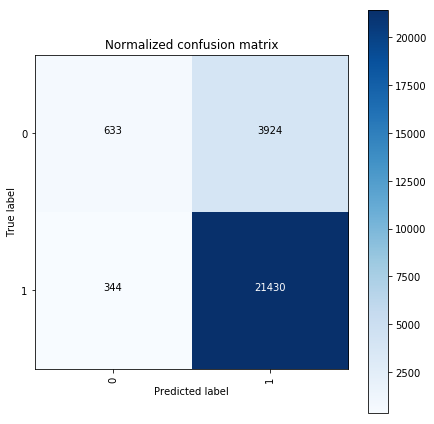

In [31]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_avgw2v_kdt)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_avgw2v_kdt)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [32]:
optimalk_avgw2v_brute = Optimal_K(X_train_AvgW2V_standarized_data,y_tr,'brute')

('\nThe optimal number of neighbors =', 15)


('\nThe optimal number of neighbors =', 15)


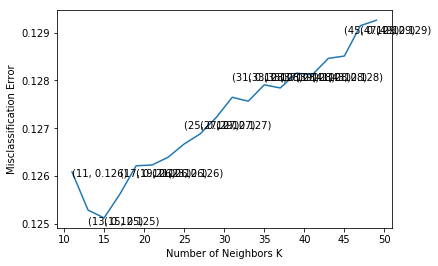

('the misclassification error for each k value is : ', array([0.126, 0.125, 0.125, 0.126, 0.126, 0.126, 0.126, 0.127, 0.127,
       0.127, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.129,
       0.129, 0.129]))


In [33]:
k_avgw2v_brute = CV_Error_Plot(X_train_AvgW2V_standarized_data,y_tr,'brute')

In [34]:
train_error_avgw2v_brute,test_error_avgw2v_brute,y_pred_ts_avgw2v_brute,knn_optimal_avgw2v_brute = \
Train_Test_Error(optimalk_avgw2v_brute,X_train_AvgW2V_standarized_data,y_tr,X_test_AvgW2V_standarized_data,y_test)


 Train error is : 0.111633735881

 Test error is : 0.1620903118



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.65      0.14      0.23      4557
          1       0.85      0.98      0.91     21774

avg / total       0.81      0.84      0.79     26331


  CONFUSION MATRIX
[[  633  3924]
 [  344 21430]]

  Plot of CONFUSION MATRIX


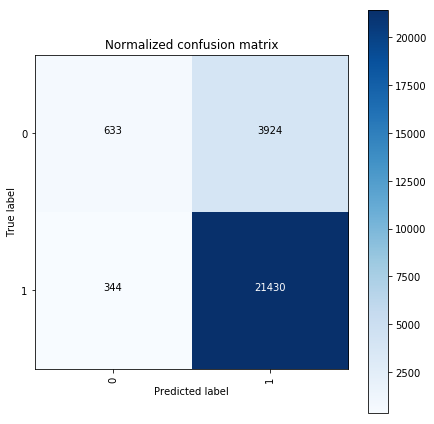

In [35]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_avgw2v_brute)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_avgw2v_brute)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

# TFIDF-W2V

In [46]:
optimalk_TFIDF_W2V_kdt = Optimal_K(X_train_TFIDF_W2V_standarized_data,y_tr,'kd_tree')

('\nThe optimal number of neighbors =', 15)


('\nThe optimal number of neighbors =', 15)


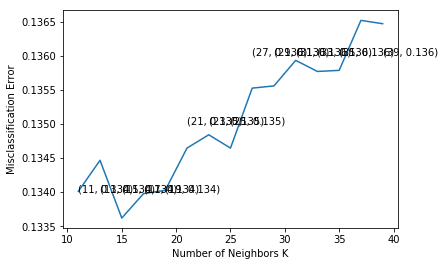

('the misclassification error for each k value is : ', array([0.134, 0.134, 0.134, 0.134, 0.134, 0.135, 0.135, 0.135, 0.136,
       0.136, 0.136, 0.136, 0.136, 0.137, 0.136]))


In [47]:
k_TFIDF_W2V_kdt = CV_Error_Plot(X_train_TFIDF_W2V_standarized_data,y_tr,'kd_tree')

In [48]:
train_error_TFIDF_W2V_kdt,test_error_TFIDF_W2V_kdt,y_pred_ts_TFIDF_W2V_kdt,knn_optimal_TFIDF_W2V_kdt = \
Train_Test_Error(optimalk_TFIDF_W2V_kdt,X_train_TFIDF_W2V_standarized_data,y_tr,X_test_TFIDF_W2V_standarized_data,y_test)


 Train error is : 0.121008430715

 Test error is : 0.166153963009



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.61      0.11      0.19      4557
          1       0.84      0.98      0.91     21774

avg / total       0.80      0.83      0.78     26331


  CONFUSION MATRIX
[[  519  4038]
 [  337 21437]]

  Plot of CONFUSION MATRIX


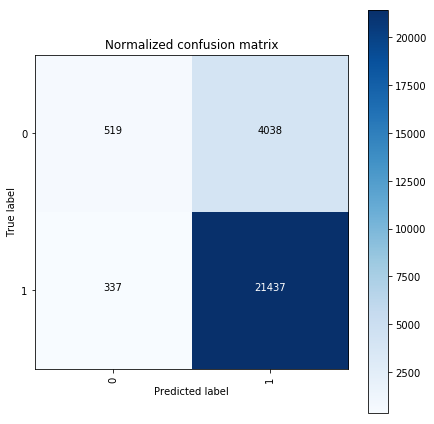

In [49]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_TFIDF_W2V_kdt)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_TFIDF_W2V_kdt)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [50]:
optimalk_TFIDF_W2V_brute = Optimal_K(X_train_TFIDF_W2V_standarized_data,y_tr,'brute')

('\nThe optimal number of neighbors =', 15)


('\nThe optimal number of neighbors =', 15)


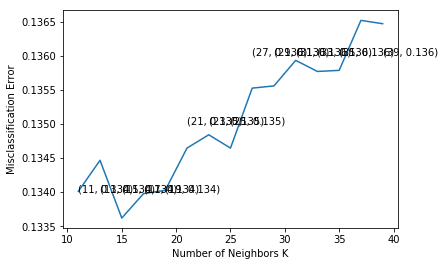

('the misclassification error for each k value is : ', array([0.134, 0.134, 0.134, 0.134, 0.134, 0.135, 0.135, 0.135, 0.136,
       0.136, 0.136, 0.136, 0.136, 0.137, 0.136]))


In [51]:
k_TFIDF_W2V_brute = CV_Error_Plot(X_train_TFIDF_W2V_standarized_data,y_tr,'brute')

In [52]:
train_error_TFIDF_W2V_brute,test_error_TFIDF_W2V_brute,y_pred_ts_TFIDF_W2V_brute,knn_optimal_TFIDF_W2V_brute = \
Train_Test_Error(optimalk_TFIDF_W2V_brute,X_train_TFIDF_W2V_standarized_data,y_tr,X_test_TFIDF_W2V_standarized_data,y_test)


 Train error is : 0.121008430715

 Test error is : 0.166153963009



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.61      0.11      0.19      4557
          1       0.84      0.98      0.91     21774

avg / total       0.80      0.83      0.78     26331


  CONFUSION MATRIX
[[  519  4038]
 [  337 21437]]

  Plot of CONFUSION MATRIX


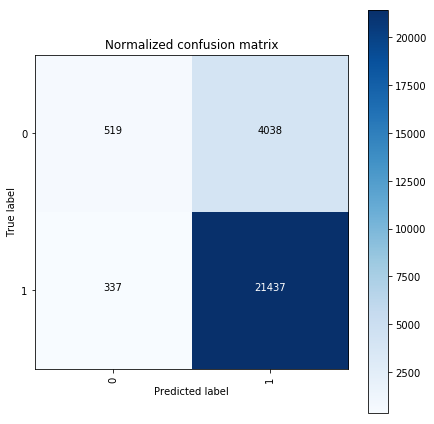

In [53]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_TFIDF_W2V_brute)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_TFIDF_W2V_brute)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [71]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorization Model", "SearchMethood", "Optimal_K", "Training Error","Test Error"]

x.add_row(["Bow", "kd_tree",optimalk_bow_kdtree, round(train_error_bow_kdt*100,2),round(test_error_bow_kdt*100,2)])
x.add_row(["Bow", "Brute",optimalk_bow_brute,round(train_error_bow_brute*100,2),round(test_error_bow_brute*100,2)])

x.add_row(["TFIDF", "kd_tree", optimalk_tfidf_kdtree,round(train_error_tfidf_kdt*100,2),round(test_error_tfidf_kdt*100,2)])
x.add_row(["TFIDF", "Brute", optimalk_tfidf_brute,round(train_error_tfidf_brute*100,2),round(test_error_tfidf_brute*100,2)])

x.add_row(["AvgW2V", "kd_tree", optimalk_avgw2v_kdt,round(train_error_avgw2v_kdt*100,2),round(test_error_avgw2v_kdt*100,2)])
x.add_row(["AvgW2V", "Brute", optimalk_avgw2v_kdt,round(train_error_avgw2v_brute*100,2),round(test_error_avgw2v_brute*100,2)])

x.add_row(["TFIDF-W2V", "kd_tree", optimalk_TFIDF_W2V_kdt,round(train_error_TFIDF_W2V_kdt*100,2),round(test_error_TFIDF_W2V_kdt*100,2)])
x.add_row(["TFIDF-W2V", "Brute", optimalk_TFIDF_W2V_brute,round(train_error_TFIDF_W2V_brute*100,2),round(test_error_TFIDF_W2V_brute*100,2)])


print(x)

+---------------------+---------------+-----------+----------------+------------+
| Vectorization Model | SearchMethood | Optimal_K | Training Error | Test Error |
+---------------------+---------------+-----------+----------------+------------+
|         Bow         |    kd_tree    |     19    |     15.26      |   17.08    |
|         Bow         |     Brute     |     19    |     15.26      |   17.08    |
|        TFIDF        |    kd_tree    |     27    |     15.33      |   17.14    |
|        TFIDF        |     Brute     |     27    |     15.33      |   17.14    |
|        AvgW2V       |    kd_tree    |     15    |     11.16      |   16.21    |
|        AvgW2V       |     Brute     |     15    |     11.16      |   16.21    |
|      TFIDF-W2V      |    kd_tree    |     15    |      12.1      |   16.62    |
|      TFIDF-W2V      |     Brute     |     15    |      12.1      |   16.62    |
+---------------------+---------------+-----------+----------------+------------+


It is observer that KNN worked better with AvgW2v with an optimal Kvalue= 15